# Maximize f(x) using Genetic Algorithm
In this file, we want to maximize f(x)=(x^4 / 15) - ln(x) + tan^2(x + pi) - (3 * (x^7)) + 11 over internal [-10,20]


Key Features of the Code:    

*   Handle Domain Issues:
The function contains ln⁡(x)ln(x) and tan⁡(x+π)tan(x+π), which can result in invalid or undefined values. The try-except block ensures the algorithm skips invalid candidates.
Domain limits ensure the algorithm only tests valid values of xx.

*   Maximization: The fitness_function directly returns the function value, as we are maximizing.


*   Selection Mechanism: Tournament selection is used, where the fittest individuals are more likely to reproduce.

*   Bounds: Mutation and initialization are constrained to [−10,20][−10,20].
*   Reporting Progress: The best fitness is printed every 10 generations to monitor the algorithm's performance.

   
        

For better understanding, we first illustrate this optimization problem by plotting it:



<ipython-input-1-1610bf1ea2f0>:7: RuntimeWarning: invalid value encountered in log
  return (x ** 4 / 15) - np.log(x) + (np.tan(x + np.pi) ** 2) - (3 * (x ** 7)) + 11
<ipython-input-1-1610bf1ea2f0>:7: RuntimeWarning: divide by zero encountered in log
  return (x ** 4 / 15) - np.log(x) + (np.tan(x + np.pi) ** 2) - (3 * (x ** 7)) + 11


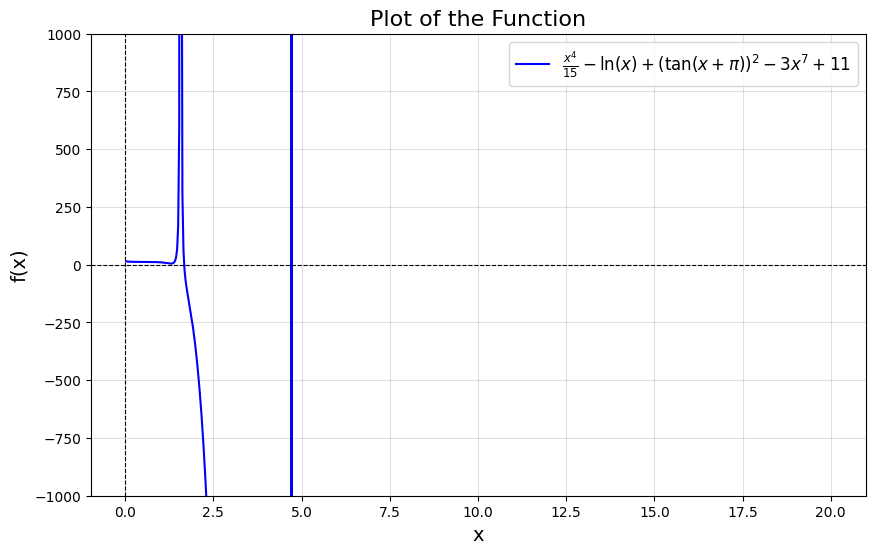

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def target_function(x):
    try:
        return (x ** 4 / 15) - np.log(x) + (np.tan(x + np.pi) ** 2) - (3 * (x ** 7)) + 11
    except (ValueError, OverflowError):  # Handle invalid cases
        return np.nan

# Define the range for x
x = np.linspace(-10, 20, 1000)

# Compute the function values safely
y = np.array([target_function(val) for val in x])

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"$\frac{x^4}{15} - \ln(x) + (\tan(x + \pi))^2 - 3x^7 + 11$", color='blue')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Plot of the Function", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.ylim(-1000, 1000)  # Adjusted to handle large function values
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()


now,
Steps to Follow:

*   Define the Problem: in this case maximize the given function.
*   Encode the Problem: Represent the solution (in this case, the value of x) as a chromosome.

*   Generate Initial Population: Create a set of initial potential solutions.
*   Evaluate Fitness: Calculate the function's value for each chromosome.
*   Selection: Select parents based on their fitness.
*   Crossover: Combine parents to produce offspring.
*   Mutation: Introduce small random changes to offspring.
*   Replacement: Replace the less fit individuals with offspring.
*   Termination: Repeat until a stopping condition is met (e.g., max iterations or fitness threshold).

   
   
   

In [2]:
# Importing necessary libraries
import numpy as np
import random


In [3]:
# Define the function to maximize
def target_function(x):
    try:
        return (x ** 4 / 15) - np.log(x) + (np.tan(x + np.pi) ** 2) - (3 * (x ** 7)) + 11
    except (ValueError, OverflowError):  # Handle invalid cases
        return float('-inf')


In [5]:
# Genetic Algorithm parameters
POPULATION_SIZE = 100
GENERATIONS = 200
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8
X_BOUNDS = (1e-5, 20)  # Adjusted to ensure x > 0 for log


# Tournament Selection

Tournament selection is a popular method for choosing parents in a Genetic Algorithm (GA). How it works is as follows:



*   Random Sampling: A fixed number of individuals (denoted as k, called the tournament size) are randomly chosen from the population.
*   Tournament: Among these k individuals, the one with the highest fitness (or lowest in case of minimization) is selected as a parent.


*   Repetition: This process is repeated until the desired number of parents is selected for crossover.
        

### Advantages of Tournament Selection


*   Control over Selection Pressure: The parameter k directly influences the selection pressure: Higher k values make the selection process more elitist, favoring fitter individuals. Lower k values allow less fit individuals a higher chance of being selected, introducing diversity.

*   Efficiency: Tournament selection is simple to implement and works efficiently, especially for large populations.
*   Flexibility: You can control how strongly fitness influences selection, making it adaptable to various problems.



In [6]:
# Generate initial population
def initialize_population(size, bounds):
    return np.random.uniform(bounds[0], bounds[1], size)

# Fitness function (maximize the target function)
def fitness_function(x):
    result = target_function(x)
    return result if np.isfinite(result) else float('-inf')

# Selection (Tournament Selection)
def select_parents(population, fitness, k=3):
    selected = random.choices(population, weights=fitness - min(fitness) + 1e-10, k=k)
    return max(selected, key=fitness_function)

# Crossover (Single-point crossover)
def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        # Perform crossover
        return (parent1 + parent2) / 2, (parent1 + parent2) / 2
    return parent1, parent2  # Return both parents as children in fallback


# Mutation (Random Resetting)
def mutate(individual, bounds):
    if random.random() < MUTATION_RATE:
        return np.random.uniform(bounds[0], bounds[1])
    return individual



In [7]:
# Main GA loop
def genetic_algorithm():
    population = initialize_population(POPULATION_SIZE, X_BOUNDS)

    for generation in range(GENERATIONS):
        # Calculate fitness for the population
        fitness = np.array([fitness_function(ind) for ind in population])

        # Filter out invalid individuals
        valid_indices = np.isfinite(fitness)
        if not valid_indices.any():
            print(f"Warning: All individuals invalid in generation {generation}. Regenerating...")
            population = initialize_population(POPULATION_SIZE, X_BOUNDS)
            continue

        fitness[~valid_indices] = float('-inf')

        # Report progress every 10 generations
        if generation % 10 == 0:
            print(f"Generation {generation}: Best fitness = {max(fitness)}")

        # Generate new population
        new_population = []
        for _ in range(POPULATION_SIZE // 2):
            # Select parents
            parent1 = select_parents(population, fitness)
            parent2 = select_parents(population, fitness)
            # Perform crossover
            child1, child2 = crossover(parent1, parent2)
            # Mutate children
            child1 = mutate(child1, X_BOUNDS)
            child2 = mutate(child2, X_BOUNDS)
            new_population.extend([child1, child2])

        # Replace old population with new population
        population = np.array(new_population)

    # Find and return the best solution
    fitness = np.array([fitness_function(ind) for ind in population])
    best_index = np.argmax(fitness)
    return population[best_index], fitness[best_index]


## Example Output

When we run the code, we'll see outputs similar to this:



```
Generation 0: Best fitness = 12.34
Generation 10: Best fitness = 18.56
...
Best solution: x = 3.21, f(x) = 19.87

```




In [42]:
# Run the Genetic Algorithm
best_solution, best_fitness = genetic_algorithm()
print(f"Best solution: x = {best_solution}, f(x) = {best_fitness}")

Generation 0: Best fitness = 79.3501821379838
Generation 10: Best fitness = 126196000667.59421
Generation 20: Best fitness = 126196000667.59421
Generation 30: Best fitness = 126196000667.59421
Generation 40: Best fitness = 126196000667.59421
Generation 50: Best fitness = 126196000667.59421
Generation 60: Best fitness = 126196000667.59421
Generation 70: Best fitness = 126196000667.59421
Generation 80: Best fitness = 126196000667.59421
Generation 90: Best fitness = 126196000667.59421
Generation 100: Best fitness = 126196000667.59421
Generation 110: Best fitness = 126196000667.59421
Generation 120: Best fitness = 126196000667.59421
Generation 130: Best fitness = 126196000667.59421
Generation 140: Best fitness = 126196000667.59421
Generation 150: Best fitness = 126196000667.59421
Generation 160: Best fitness = 126196000667.59421
Generation 170: Best fitness = 126196000667.59421
Generation 180: Best fitness = 126196000667.59421
Generation 190: Best fitness = 126196000667.59421
Best solution